# Global Power Plant Database

###### Problem Statement:

##### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

###### The database includes the following indicators:

1. `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
2. `country_long` (text): longer form of the country designation
3. `name` (text): name or title of the power plant, generally in Romanized form
4. `gppd_idnr` (text): 10 or 12 character identifier for the power plant
5. `capacity_mw` (number): electrical generating capacity in megawatts
6. `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7. `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8. `primary_fuel` (text): energy source used in primary electricity generation or export
9. `other_fuel1` (text): energy source used in electricity generation or export
10. `other_fuel2` (text): energy source used in electricity generation or export
11. `other_fuel3` (text): energy source used in electricity generation or export
12.  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13. `owner` (text): majority shareholder of the power plant, generally in Romanized form
14. `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. `url` (text): web document corresponding to the `source` field
16. `geolocation_source` (text): attribution for geolocation information
17. `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. `year_of_capacity_data` (number): year the capacity information was reported
19. `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20. `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21. `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22. `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23. `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24. `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25. `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26. `generation_data_source` (text): attribution for the reported generation information
27. `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
28. `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
29. `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
30. `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
31. `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
32. 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
33. `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
34. `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
35. `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
36. `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation

###### We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

### Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('power_plant.csv')

In [3]:
pd.set_option('display.max_columns',30)
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [4]:
df.shape

(907, 27)

907 rows and 27 columns

In [5]:
#all variables names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

All deatils about columns already mentioned above

In [6]:
#checking datatype of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
#checking Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []
Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []
Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitu

No Empty spaces in dataset

<AxesSubplot:>

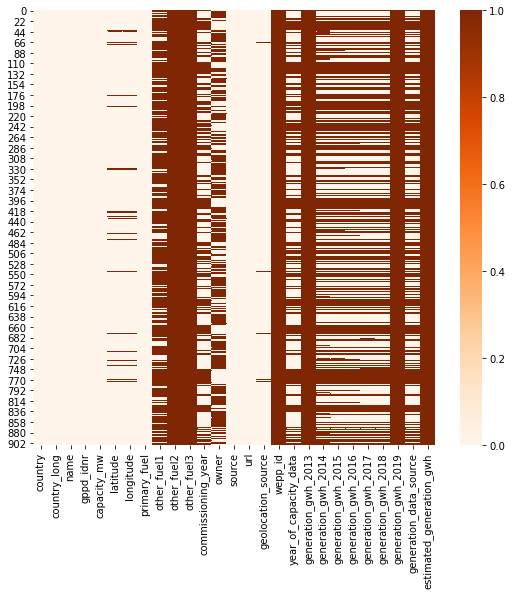

In [8]:
#checking null values using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Oranges')

There are many null values in dataset

In [9]:
#checking null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

### Handling Null values

In [10]:
#In other_fuel2 variable 906 are NaN values ,so drop that column
df.drop('other_fuel2',axis=1,inplace=True)

In [11]:
#In other_fuel3 variable 907 rows are NaN values , so drop that column
df.drop('other_fuel3',axis=1,inplace=True)

In [12]:
#In wepp_id variable 907 rows are NaN values , so drop that column
df.drop('wepp_id',axis=1,inplace=True)

In [13]:
#In generation_gwh_2013 variable also full empty column ,so drop that column
df.drop('generation_gwh_2013',axis=1,inplace=True)

In [14]:
#In generation_gwh_2019 variable also full empty column , so drop that column
df.drop('generation_gwh_2019',axis=1,inplace=True)

In [15]:
#In estimated_generation_gwh also full empty column ,so drop that column
df.drop('estimated_generation_gwh',axis=1,inplace=True)

###### Simple Imputer

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
sim_int=SimpleImputer(strategy='mean')
sim_object=SimpleImputer(strategy='most_frequent')

In [18]:
list_int=['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
list_object=['other_fuel1','owner','geolocation_source','generation_data_source']

In [19]:
for x in list_int:
    df[x]=sim_int.fit_transform(df[x].values.reshape(-1,1))

In [20]:
for x in list_object:
    df[x]=sim_object.fit_transform(df[x].values.reshape(-1,1))

In [21]:
#checcking null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now , There is no Null values in Dataset

In [22]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      907 non-null    object 
 14  year_of_capacity_data   907 non-null    fl

###### Observations:-

1. RangeIndex: 907 entries, 0 to 906
2. Data columns (total 21 columns)
3. There is no null values
4. dtypes: float64(10), object(11)
5. memory usage: 148.9+ KB

In [23]:
#counting uniques of all columns
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
dtype: int64

In [24]:
#drop the column those which have only 1 unique
df.drop('country',axis=1,inplace=True)
df.drop('country_long',axis=1,inplace=True)
df.drop('year_of_capacity_data',axis=1,inplace=True)
df.drop('generation_data_source',axis=1,inplace=True)

In [25]:
df.nunique()

name                   907
gppd_idnr              907
capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
other_fuel1              3
commissioning_year      74
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

### Unique And Value Count information

In [26]:
#checking unique
print(df['primary_fuel'].unique())
#counting unique values
print(df['primary_fuel'].value_counts())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


This is target variable , Coal power plants are high here.

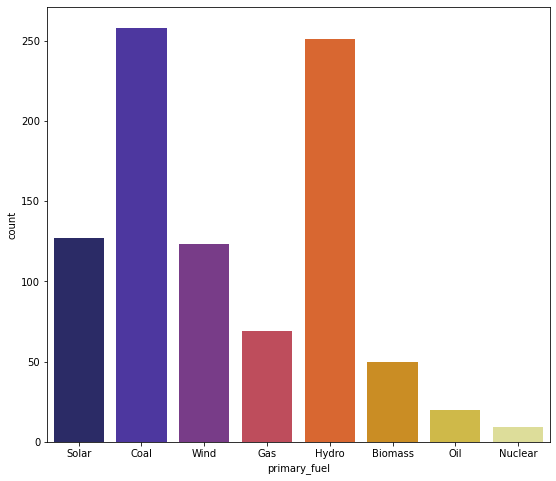

In [27]:
#countplot of primary_fuel
plt.figure(figsize=(9,8))
sns.countplot(df['primary_fuel'],palette='CMRmap');

If you observe hereHydro and Coal power plants are many here.

In [28]:
#checking unique
print(df['other_fuel1'].unique())
#counting unique values
print(df['other_fuel1'].value_counts())

['Oil' 'Cogeneration' 'Gas']
Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


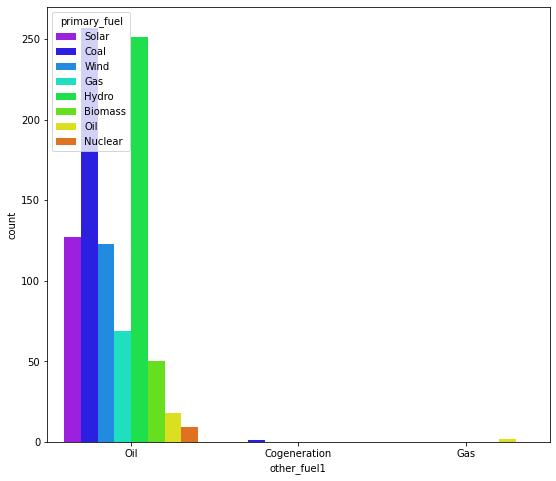

In [29]:
#countplot of primary_fuel
plt.figure(figsize=(9,8))
sns.countplot(df['other_fuel1'],palette='gist_rainbow_r',hue='primary_fuel',data=df);

Almost every power plants are Oil fuels only

In [30]:
#checking unique
print(df['geolocation_source'].unique())
#counting unique values
print(df['geolocation_source'].value_counts())

['National Renewable Energy Laboratory' 'WRI' 'Industry About']
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


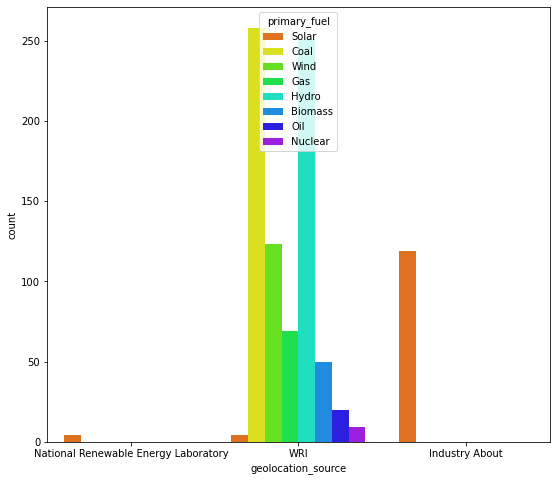

In [31]:
#countplot of primary_fuel
plt.figure(figsize=(9,8))
sns.countplot(df['geolocation_source'],palette='gist_rainbow',hue='primary_fuel',data=df);

If you observe here WRI geolocations are many and also hydro and coal plants are high.

### Histogram

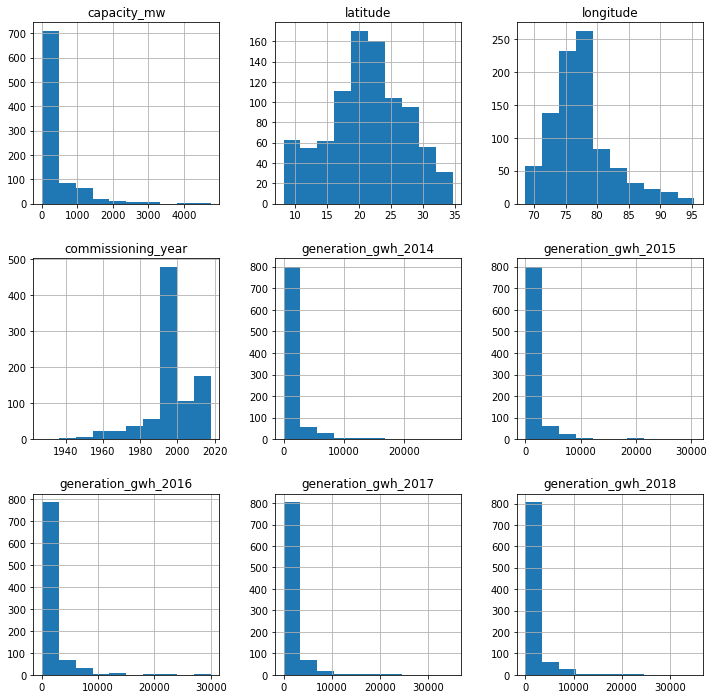

In [32]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

### Pie Chart

In [33]:
px.pie(df,values='capacity_mw',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

###### Observations:-

1. 69.6% of Electric power generate using Coal.
2. 15.7% of Electric power generate using Hydro.
3. Others are below 10% .

In [34]:
px.pie(df,values='commissioning_year',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

In [35]:
px.pie(df,values='generation_gwh_2014',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

###### Observations:-

1. 45.3% electricity generation in gigawatt-hours reported for the year 2014 using Coal fuel.
2. 15.2% electricity generation in gigawatt-hours reported for the year 2014 using Hydro fuel.
3. 14% electricity generation in gigawatt-hours reported for the year 2014 using Solar.
4. 13.6% electricity generation in gigawatt-hours reported for the year 2014 using Wind.
5. Other fuel are below 10% electricity generation in gigawatt-hours reported for the year 2014.

In [36]:
px.pie(df,values='generation_gwh_2015',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

###### Observations:-

1. 46.3% electricity generation in gigawatt-hours reported for the year 2015 using Coal.
2. 14.3% electricity generation in gigawatt-hours reported for the year 2015 using Hydro.
3. 14% electricity generation in gigawatt-hours reported for the year 2015 using Solar.
4. 13.6% electricity generation in gigawatt-hours reported for the year 2015 using Wind.
5. If you observe here using Coal fuel electricity generation increase in 2015 compare to 2014.

In [37]:
px.pie(df,values='generation_gwh_2016',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

###### Observations:-

1. 47.1% electricity generation in gigawatt-hours reported for the year 2016 using Coal.
2. 14% electricity generation in gigawatt-hours reported for the year 2016 using Solar.
3. 13.8% electricity generation in gigawatt-hours reported for the year 2016 using Hydro.
4. 13.6% electricity generation in gigawatt-hours reported for the year 2016 using Wind.
5. If you observe here using Coal fuel electricity generation increase in 2016 compare to 2015.
6. Here using  Hydro is decreases , using Coal and Solar increases compare  to 2014 and 2015.

In [38]:
px.pie(df,values='generation_gwh_2017',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

###### Observations:-

1. 47.2% electricity generation in gigawatt-hours reported for the year 2017 using Coal.
2. 14% electricity generation in gigawatt-hours reported for the year 2017 using Solar.
3. 13.6% electricity generation in gigawatt-hours reported for the year 2017 using Wind.
4. 13.1% electricity generation in gigawatt-hours reported for the year 2017 using Hydro.
5. If you observe here using Coal fuel electricity generation increase in 2017 compare to 2014,2015 and 2016.
6. Using Wind is increases and Hydro is decreases

In [39]:
px.pie(df,values='generation_gwh_2018',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

###### Observations:-

1. 47.2% electricity generation in gigawatt-hours reported for the year 2018 using Coal.
2. 14% electricity generation in gigawatt-hours reported for the year 2018 using Solar.
3. 13.6% electricity generation in gigawatt-hours reported for the year 2018 using Wind.
4. 13.1% electricity generation in gigawatt-hours reported for the year 2018 using Hydro.
5. If you observe here using Coal fuel electricity generation increase in 2018 compare to 2014,2015,2016 and 2017. 
6. Hydro also 0.1% increase comapre to 2017.

In [40]:
#checking unique of target variable
print(df['primary_fuel'].unique())
#count the unique values
print(df['primary_fuel'].value_counts())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


This is imbalanced dataset

In [41]:
df['primary_fuel']=df['primary_fuel'].replace('Coal',1)
df['primary_fuel']=df['primary_fuel'].replace('Hydro',2)
df['primary_fuel']=df['primary_fuel'].replace('Solar',3)
df['primary_fuel']=df['primary_fuel'].replace('Wind',4)
df['primary_fuel']=df['primary_fuel'].replace('Biomass',5)
df['primary_fuel']=df['primary_fuel'].replace('Oil',6)
df['primary_fuel']=df['primary_fuel'].replace('Nuclear',7)
df['primary_fuel']=df['primary_fuel'].replace('Gas',8)

In [61]:
df.describe().T

count         mean          std        min          25%  \
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000   
latitude             907.0    21.197918     6.079148     8.1689    17.072000   
longitude            907.0    77.464907     4.812291    68.6447    74.388900   
primary_fuel         907.0     2.886439     2.005319     1.0000     1.000000   
commissioning_year   907.0  1997.091082    13.016360  1927.0000  1997.091082   
generation_gwh_2014  907.0  2431.823590  2665.338608     0.0000  1211.362750   
generation_gwh_2015  907.0  2428.226946  2859.349132     0.0000   916.000000   
generation_gwh_2016  907.0  2467.936859  2877.890004     0.0000   896.500214   
generation_gwh_2017  907.0  2547.759305  2921.502193     0.0000   882.594850   
generation_gwh_2018  907.0  2600.804099  3030.808041     0.0000   824.842340   

                             50%          75%        max  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.281800    25.176450     34.649  
longitude              76.979200    79.206100     95.408  
primary_fuel            2.000000     4.000000      8.000  
commissioning_year   1997.091082  2003.000000   2018.000  
generation_gwh_2014  2431.823590  2431.823590  28127.000  
generation_gwh_2015  2428.226946  2428.226946  30539.000  
generation_gwh_2016  2467.936859  2467.936859  30015.000  
generation_gwh_2017  2547.759305  2547.759305  35116.000  
generation_gwh_2018  2600.804099  2600.804099  35136.000

### Label Encoder

In [42]:
from sklearn.preprocessing import LabelEncoder

In [52]:
df.dtypes

name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int64
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [53]:
#removing target variable
df1=df.drop('primary_fuel',axis=1)

In [54]:
#applying label encoder
df1=df1.apply(LabelEncoder().fit_transform)

In [56]:
#adding target variable
df1['primary_fuel']=df['primary_fuel']

In [57]:
df1

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0       0        657            9       731        143            2   
1       1        519          177       594        234            2   
2       2        853          121       420          8            2   
3       3          0          200       547        806            2   
4       4          1          340       423        702            2   
..    ...        ...          ...       ...        ...          ...   
902   902        491          336       176        480            2   
903   903        822           10       104        553            2   
904   904        891           81       151        311            2   
905   905        539          167       572        167            2   
906   906        876           56        32        495            2   

     commissioning_year  owner  source  url  geolocation_source  \
0                    66    229     109  128                   1   
1                    52    258     174  173                   2   
2                    52      2      21  205                   2   
3                    59      5      22   58                   2   
4                    70      5      22   58                   2   
..                  ...    ...     ...  ...                 ...   
902                  71      5      22   58                   2   
903                  52    114      77   22                   0   
904                  52      5      21  260                   2   
905                  52     91      59   82                   2   
906                  52    279      21  245                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                    250                  265                  268   
1                    250                  265                  268   
2                    250                  265                  268   
3                    156                  196                  197   
4                    272                  349                  360   
..                   ...                  ...                  ...   
902                  250                    3                   99   
903                  250                  265                  268   
904                  250                  265                  268   
905                  250                  265                  268   
906                  250                  265                  268   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                    270                  272             3  
1                    270                  272             1  
2                    270                  272             4  
3                    176                  174             8  
4                    339                  374             1  
..                   ...                  ...           ...  
902                  193                  182             1  
903                  270                  272             3  
904                  270                  272             4  
905                  270                  272             1  
906                  270                  272             4  

[907 rows x 17 columns]

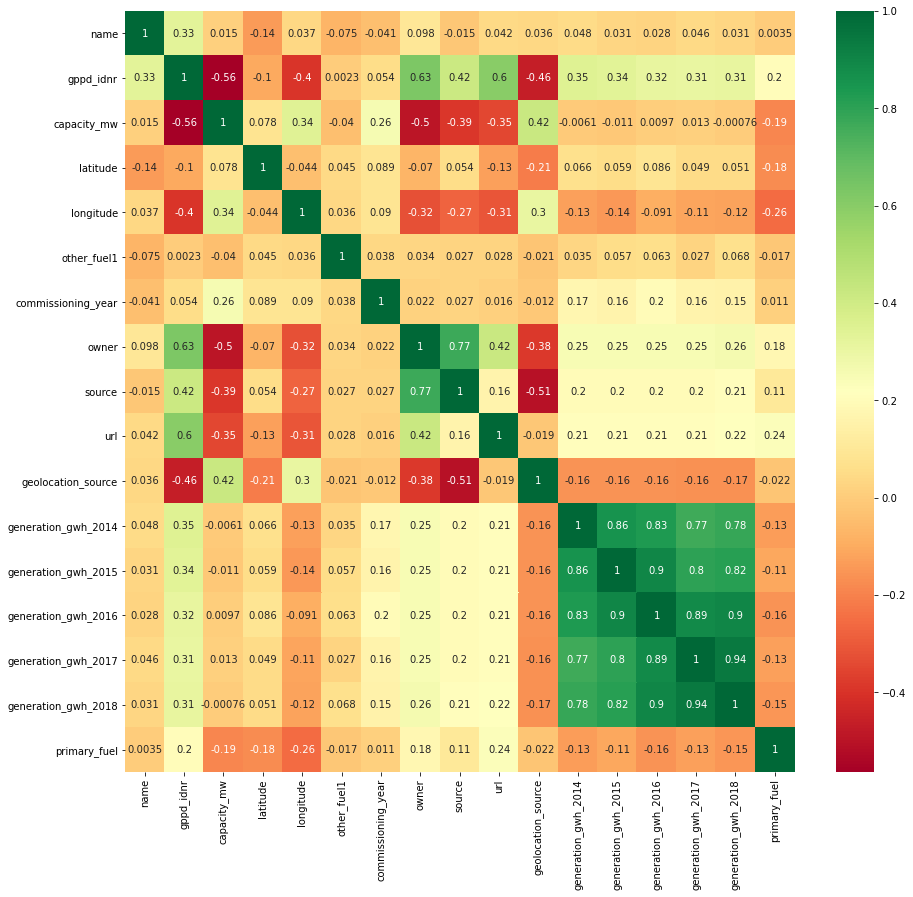

In [65]:
#checking correlation using HeatMap
plt.figure(figsize=(15,14))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn');

Green is high Positive correlation and Red is high Negative correlation , Yellow is Idle or Positive correlation.

In [67]:
#checking correlation
df1.corr()

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                 1.000000   0.332205     0.014618 -0.137213   0.036612   
gppd_idnr            0.332205   1.000000    -0.563732 -0.100372  -0.395432   
capacity_mw          0.014618  -0.563732     1.000000  0.078279   0.344733   
latitude            -0.137213  -0.100372     0.078279  1.000000  -0.044093   
longitude            0.036612  -0.395432     0.344733 -0.044093   1.000000   
other_fuel1         -0.074663   0.002333    -0.040041  0.044511   0.036368   
commissioning_year  -0.041292   0.053931     0.260712  0.088759   0.089778   
owner                0.098075   0.630589    -0.495320 -0.069957  -0.321347   
source              -0.014640   0.416384    -0.392096  0.053914  -0.273287   
url                  0.041917   0.597080    -0.348166 -0.127709  -0.309979   
geolocation_source   0.036225  -0.464174     0.423657 -0.211405   0.304849   
generation_gwh_2014  0.047783   0.346833    -0.006148  0.066206  -0.127436   
generation_gwh_2015  0.031430   0.340109    -0.011158  0.059281  -0.142959   
generation_gwh_2016  0.028378   0.315496     0.009683  0.085754  -0.091117   
generation_gwh_2017  0.046151   0.306688     0.012681  0.048666  -0.111920   
generation_gwh_2018  0.030928   0.310391    -0.000765  0.050687  -0.118664   
primary_fuel         0.003540   0.203098    -0.189441 -0.175375  -0.255793   

                     other_fuel1  commissioning_year     owner    source  \
name                   -0.074663           -0.041292  0.098075 -0.014640   
gppd_idnr               0.002333            0.053931  0.630589  0.416384   
capacity_mw            -0.040041            0.260712 -0.495320 -0.392096   
latitude                0.044511            0.088759 -0.069957  0.053914   
longitude               0.036368            0.089778 -0.321347 -0.273287   
other_fuel1             1.000000            0.037823  0.033687  0.026590   
commissioning_year      0.037823            1.000000  0.021721  0.026775   
owner                   0.033687            0.021721  1.000000  0.769583   
source                  0.026590            0.026775  0.769583  1.000000   
url                     0.028154            0.016463  0.419773  0.160144   
geolocation_source     -0.021408           -0.012068 -0.384838 -0.505720   
generation_gwh_2014     0.034751            0.171476  0.248725  0.196322   
generation_gwh_2015     0.057197            0.159862  0.250465  0.197696   
generation_gwh_2016     0.063014            0.198602  0.250694  0.197876   
generation_gwh_2017     0.026986            0.160149  0.252934  0.199645   
generation_gwh_2018     0.067711            0.153997  0.262086  0.206869   
primary_fuel           -0.016624            0.011296  0.181082  0.106837   

                          url  geolocation_source  generation_gwh_2014  \
name                 0.041917            0.036225             0.047783   
gppd_idnr            0.597080           -0.464174             0.346833   
capacity_mw         -0.348166            0.423657            -0.006148   
latitude            -0.127709           -0.211405             0.066206   
longitude           -0.309979            0.304849            -0.127436   
other_fuel1          0.028154           -0.021408             0.034751   
commissioning_year   0.016463           -0.012068             0.171476   
owner                0.419773           -0.384838             0.248725   
source               0.160144           -0.505720             0.196322   
url                  1.000000           -0.018929             0.207868   
geolocation_source  -0.018929            1.000000            -0.158065   
generation_gwh_2014  0.207868           -0.158065             1.000000   
generation_gwh_2015  0.209323           -0.159171             0.856488   
generation_gwh_2016  0.209513           -0.159316             0.831844   
generation_gwh_2017  0.211386           -0.160740             0.765011   
generation_gwh_2018  0.219035           -0.166556             0.784

###### Observaions:-

1. capacity_mw , longitude and geolocation_source are high negative correlation with gppd_idnr variable
2. owner and url variables are Positive correlation with gppd_idnr variable
3. gppd_idnr and owner variables are high Negative correlation with capacity_mw
4. source is High positive correlation with owner variable
5. generation_gwh_2014,2015,2016,2017,2018 good correlation with each other.

In [70]:
df_target=df1.corr()

In [71]:
df_target['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
url                    0.235336
gppd_idnr              0.203098
owner                  0.181082
source                 0.106837
commissioning_year     0.011296
name                   0.003540
other_fuel1           -0.016624
geolocation_source    -0.022338
generation_gwh_2015   -0.107072
generation_gwh_2017   -0.127337
generation_gwh_2014   -0.132839
generation_gwh_2018   -0.153036
generation_gwh_2016   -0.160440
latitude              -0.175375
capacity_mw           -0.189441
longitude             -0.255793
Name: primary_fuel, dtype: float64

###### Observations:-

1. url and gppd_idnr are positive correlation with target variable
2. capacity_mw and longitude are negative correlation with target variable

### Scatter Plot

In [72]:
sns.set_theme()

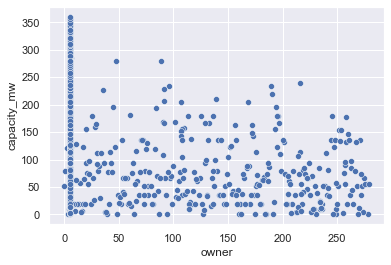

In [81]:
sns.scatterplot(df1['owner'],df1['capacity_mw'],palette='magma');

majority shareholder of the power plant in 10 owner in capacity_mw

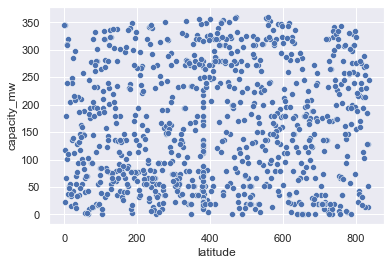

In [82]:
sns.scatterplot(df1['latitude'],df1['capacity_mw'],palette='magma');

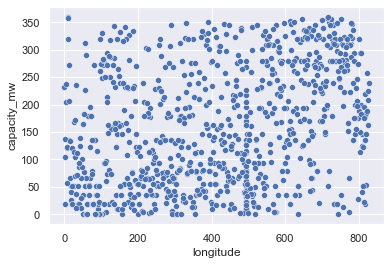

In [83]:
sns.scatterplot(df1['longitude'],df1['capacity_mw'],palette='magma');

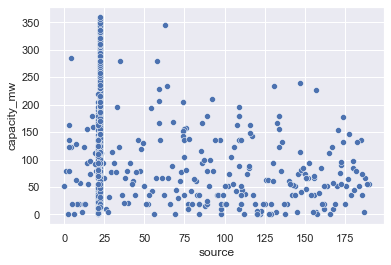

In [84]:
sns.scatterplot(df1['source'],df1['capacity_mw'],palette='magma');

entity reporting the data could be an organization, report, or document, generally in Romanized form in 20 source for capacity of magawatts

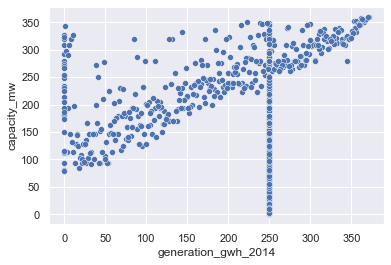

In [85]:
sns.scatterplot(df1['generation_gwh_2014'],df1['capacity_mw'],palette='magma');

electricity generation in gigawatt-hours reported for the year 2014 increases in capacity of maga watts

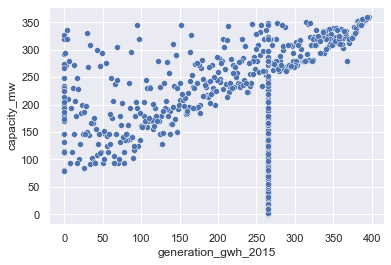

In [86]:
sns.scatterplot(df1['generation_gwh_2015'],df1['capacity_mw'],palette='magma');

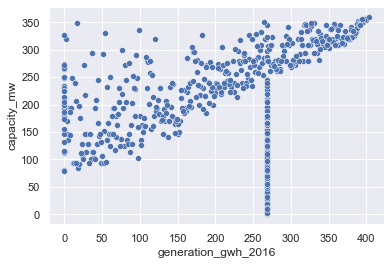

In [87]:
sns.scatterplot(df1['generation_gwh_2016'],df1['capacity_mw'],palette='magma');

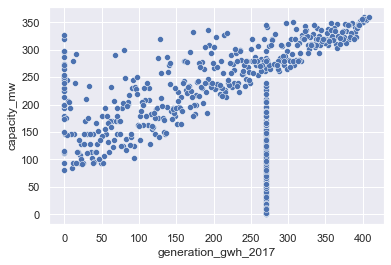

In [88]:
sns.scatterplot(df1['generation_gwh_2017'],df1['capacity_mw'],palette='magma');

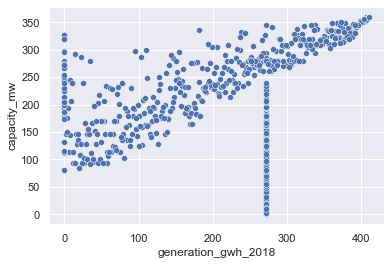

In [89]:
sns.scatterplot(df1['generation_gwh_2018'],df1['capacity_mw'],palette='magma');

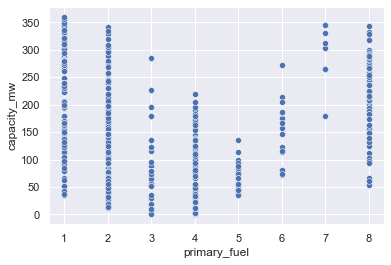

In [90]:
sns.scatterplot(df1['primary_fuel'],df1['capacity_mw'],palette='magma');

Coal,Hydro,Gas are primary fuel to high Capacity maga watts electricity generation

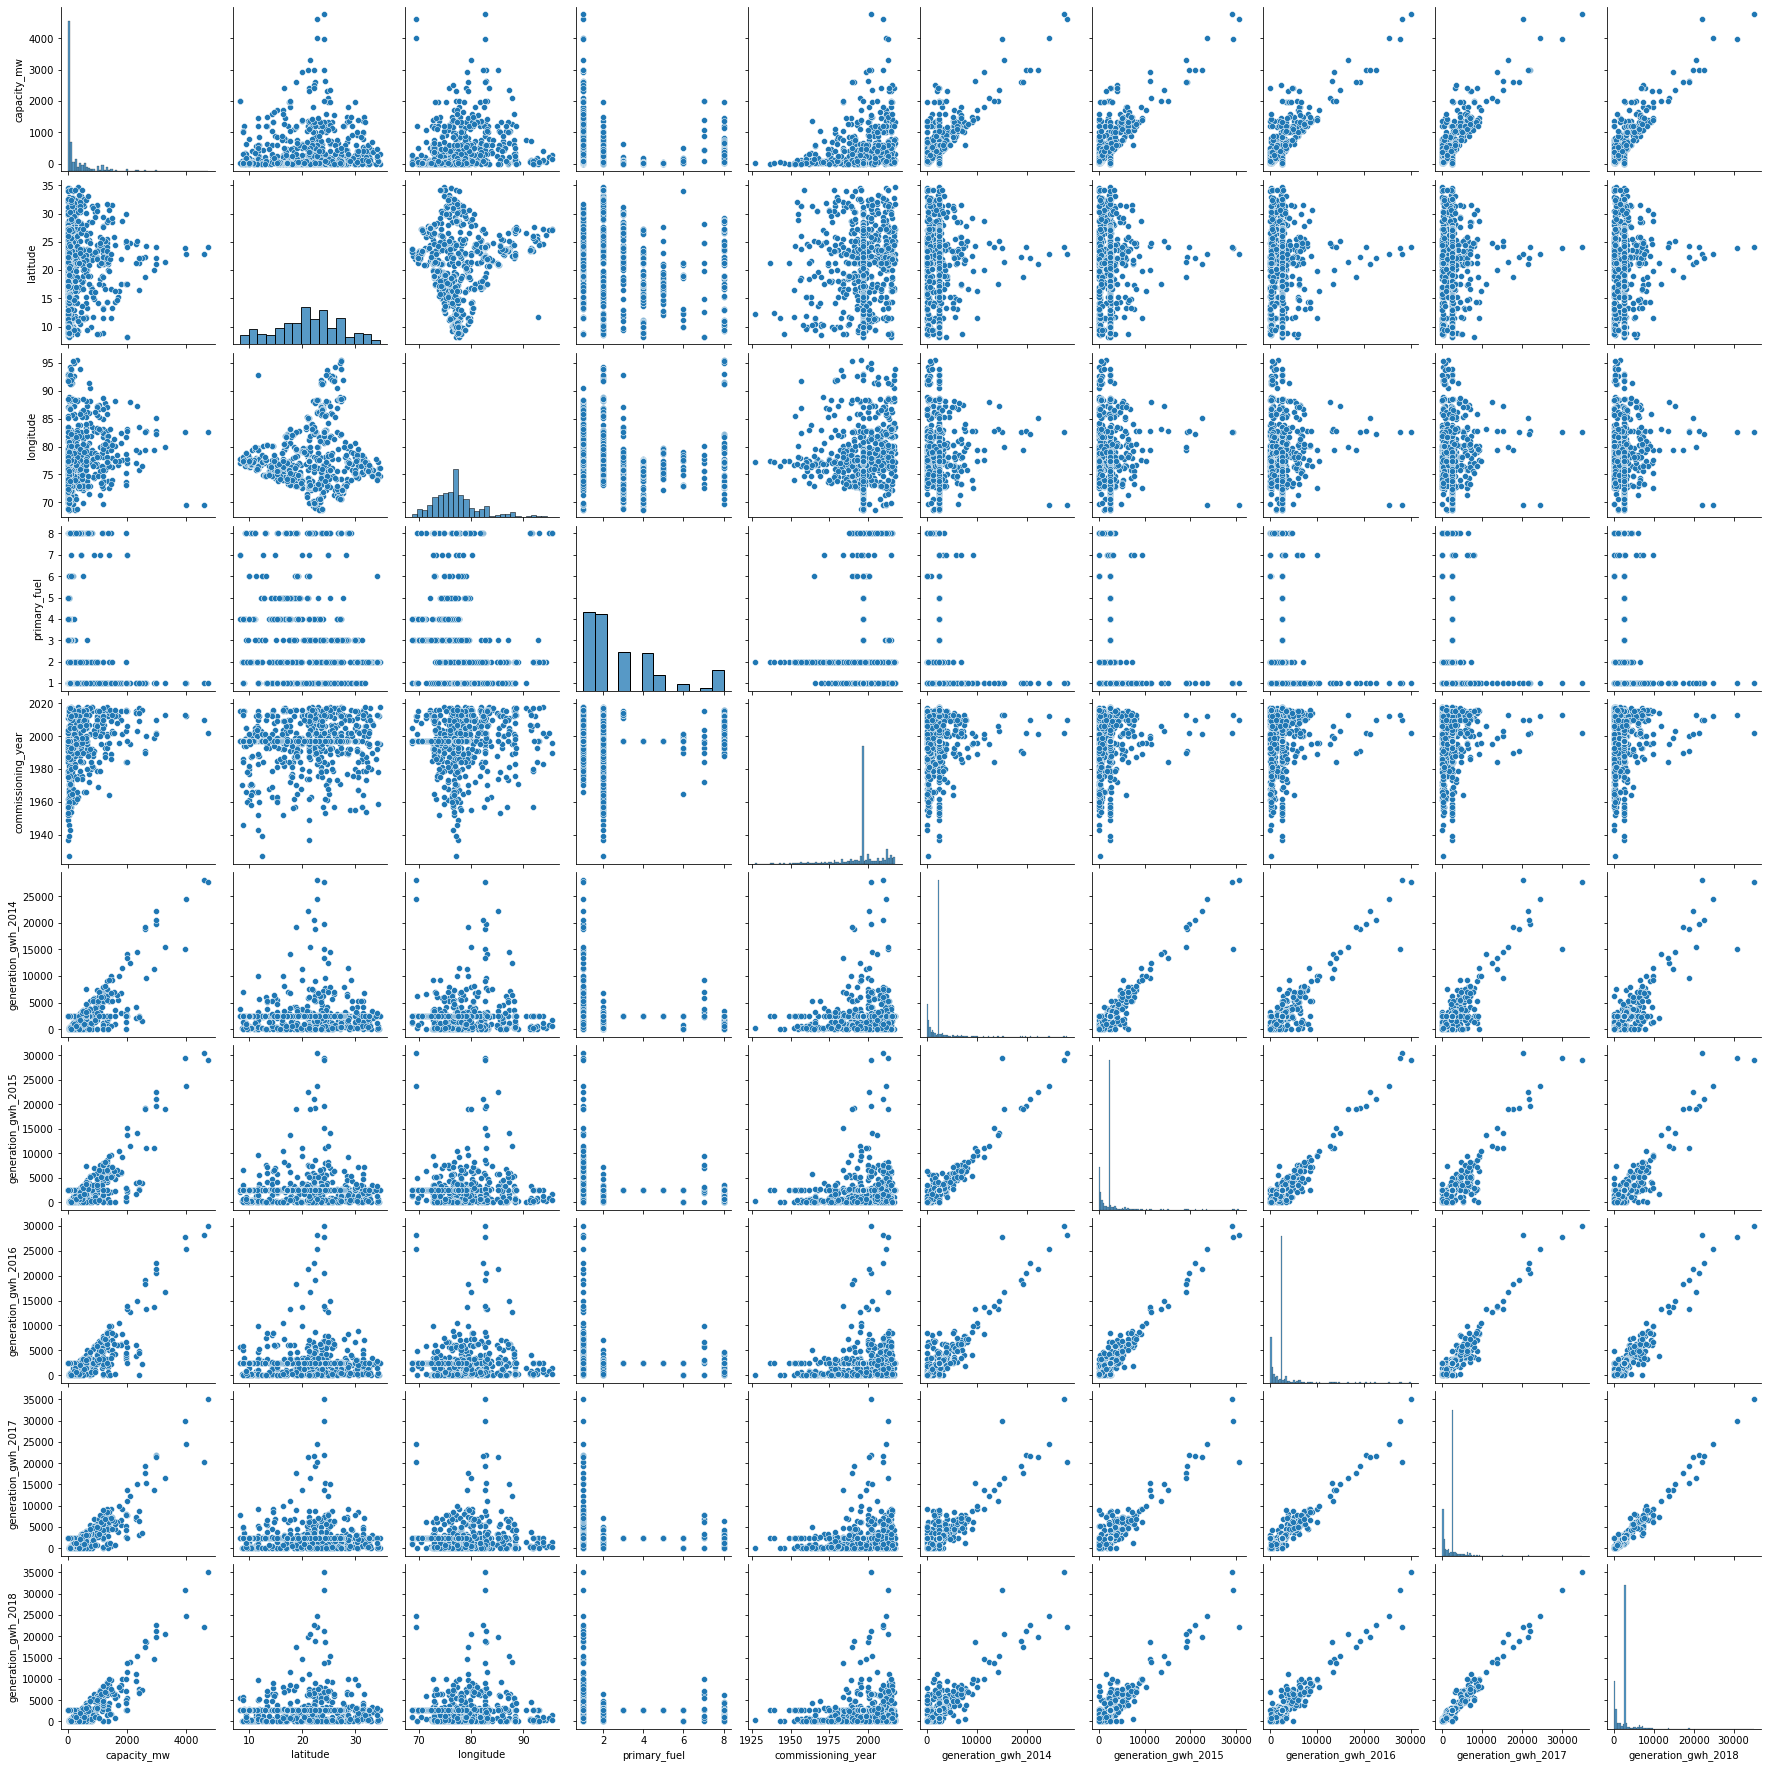

In [68]:
sns.pairplot(df)

### SMOTE

In [92]:
#dataset is imbalanced make it balance using SMOTE
dfx=df1.iloc[:,0:-1]
dfy=df1.iloc[:,-1]

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
smt=SMOTE()

In [96]:
train_x,train_y=smt.fit_resample(dfx,dfy)

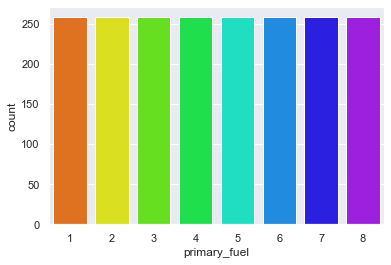

In [102]:
#count plot for train_y
sns.countplot(train_y,palette='gist_rainbow');

In [103]:
df2=train_x

In [105]:
df2['primary_fuel']=train_y

In [108]:
df2.head()

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0     0        657            9       731        143            2   
1     1        519          177       594        234            2   
2     2        853          121       420          8            2   
3     3          0          200       547        806            2   
4     4          1          340       423        702            2   

   commissioning_year  owner  source  url  geolocation_source  \
0                  66    229     109  128                   1   
1                  52    258     174  173                   2   
2                  52      2      21  205                   2   
3                  59      5      22   58                   2   
4                  70      5      22   58                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  250                  265                  268   
1                  250                  265                  268   
2                  250                  265                  268   
3                  156                  196                  197   
4                  272                  349                  360   

   generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                  270                  272             3  
1                  270                  272             1  
2                  270                  272             4  
3                  176                  174             8  
4                  339                  374             1

In [107]:
df2.shape

(2064, 17)

2064 rows and 17 columns

### checking outliers

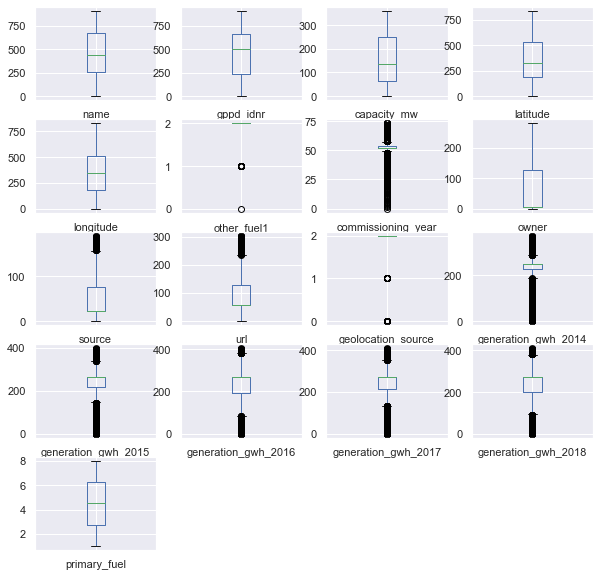

In [110]:
df2.plot(kind='box',subplots=True,layout=(5,4),figsize=(10,10));

In [140]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df2))

In [141]:
threshold=3
print(np.where(z>3))

(array([  78,   90,  169,  170,  219,  221,  222,  254,  261,  294,  342,
        371,  377,  444,  450,  454,  469,  475,  478,  479,  484,  495,
        509,  522,  531,  538,  541,  573,  583,  588,  592,  601,  621,
        649,  677,  694,  706,  709,  713,  728,  781,  807,  811,  813,
        817,  817,  848,  870,  871,  872, 1397, 1399, 1400, 1401, 1401,
       1408, 1415, 1419, 1424, 1434, 1435, 1437, 1439, 1440, 1461, 1466,
       1466, 1467, 1482, 1483, 1493, 1497, 1499, 1500, 1501, 1503, 1503,
       1505, 1510, 1512, 1541, 1541, 1548, 1561, 1562, 1567, 1574, 1576,
       1577, 1580, 1583, 1588, 1591, 1595, 1604, 1606, 1616, 1622, 1622],
      dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6,
       9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 9, 9, 9, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5

In [142]:
z[78][6]

3.392799561296902

In [143]:
df_new=df2[(z<3).all(axis=1)]

In [144]:
#after removing outliers
df_new.shape

(1971, 17)

1971 rows and 17 columns

### VIF(Variance Inflation Factor)

In [188]:
x=df_new.drop('primary_fuel',axis=1)

In [189]:
y=df_new['primary_fuel']

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [192]:
vif()

Variables  VIF Factor
0                  name    1.445876
1             gppd_idnr    5.556958
2           capacity_mw    2.799495
3              latitude    1.201364
4             longitude    1.308050
5           other_fuel1   93.492691
6    commissioning_year    1.156023
7                 owner    4.435035
8                source    3.449098
9                   url    2.255230
10   geolocation_source    1.914663
11  generation_gwh_2014    4.973044
12  generation_gwh_2015    8.818036
13  generation_gwh_2016   12.046507
14  generation_gwh_2017    7.754952
15  generation_gwh_2018   11.593326

In [193]:
#latitude,longitude,name,geolocation_source,commissioning_year as same VIF Factor , so drop latitude,longitude and name
x.drop('latitude',axis=1,inplace=True)
x.drop('longitude',axis=1,inplace=True)
x.drop('name',axis=1,inplace=True)
#owner and generation_gwh_2014 as same VIF Factor so,drop owner
x.drop('owner',axis=1,inplace=True)

### Checking Outliers

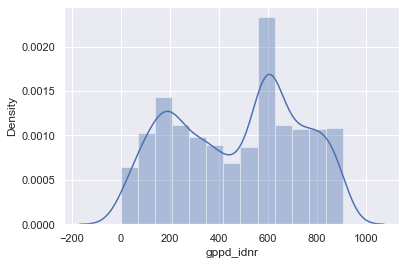

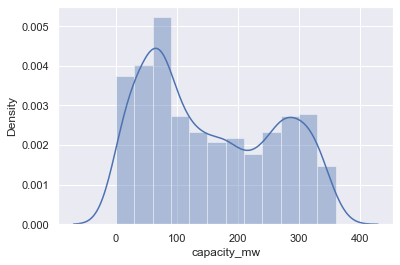

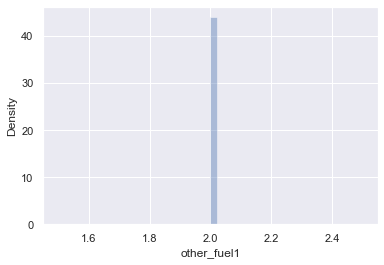

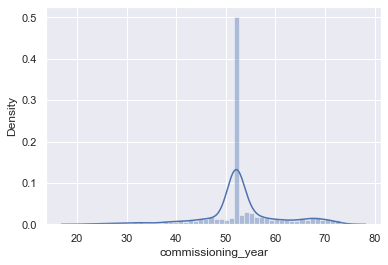

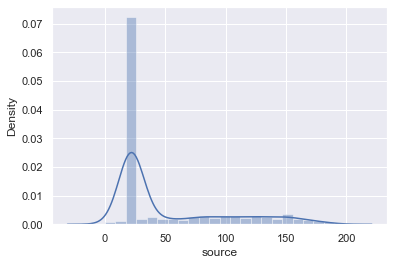

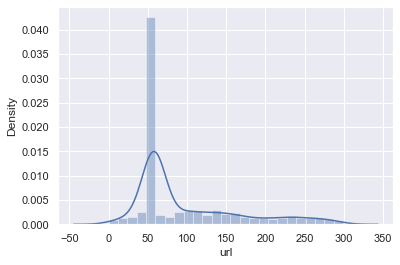

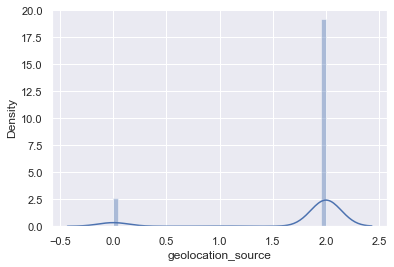

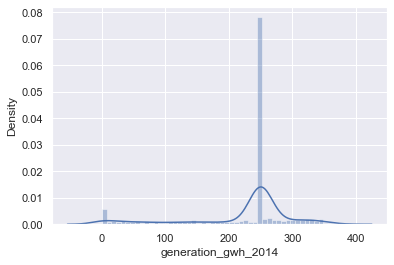

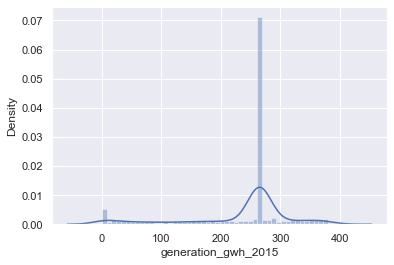

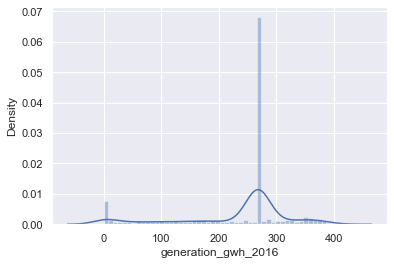

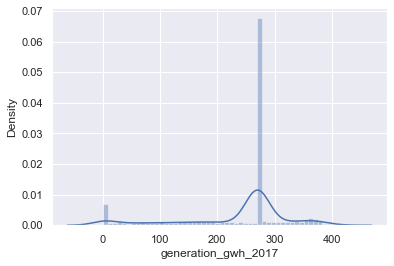

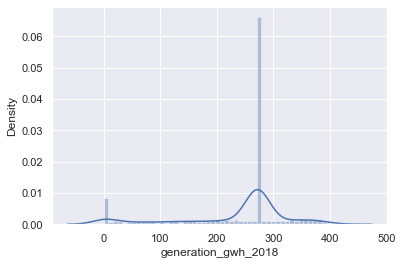

In [194]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

In [195]:
x.skew().sort_values(ascending=False)

source                 1.318619
url                    1.308423
capacity_mw            0.319396
other_fuel1            0.000000
gppd_idnr             -0.114065
commissioning_year    -0.273236
generation_gwh_2016   -1.224011
generation_gwh_2017   -1.230075
generation_gwh_2018   -1.233923
generation_gwh_2015   -1.351560
generation_gwh_2014   -1.475912
geolocation_source    -2.278966
dtype: float64

### Standard Scale

In [200]:
from sklearn.preprocessing import MinMaxScaler

In [201]:
scale=MinMaxScaler()

In [202]:
x=scale.fit_transform(x)

### Model selection

In [203]:
x.shape

(1971, 12)

In [204]:
y.shape

(1971,)

In [213]:
#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [208]:
lg=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [258]:
list_model=[lg,mnb,dtc,knc,svc,rfc,abc,gbc]

### LogisticRegression

In [210]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='YlOrBr', square=True)
    plt.xlabel("predicted")
    plt.show()

In [211]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.7483108108108109 Random state:- 64


accuracy_score:- 0.7483108108108109
              precision    recall  f1-score   support

           1       0.52      0.46      0.49        67
           2       0.48      0.71      0.58        45
           3       0.99      1.00      0.99        81
           4       1.00      0.91      0.95        95
           5       0.95      0.61      0.74       117
           6       0.40      0.75      0.52        32
           7       0.82      0.83      0.83        89
           8       0.60      0.67      0.63        66

    accuracy                           0.75       592
   macro avg       0.72      0.74      0.72       592
weighted avg       0.79      0.75      0.76       592



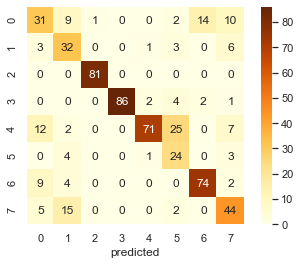

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=64)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

### MultinomialNB

In [230]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='gist_rainbow', square=True)
    plt.xlabel("predicted")
    plt.show()

In [231]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mnb.fit(x_train,y_train)
    pred=mnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.6317567567567568 Random state:- 32


accuracy_score:- 0.6317567567567568
              precision    recall  f1-score   support

           1       0.31      0.42      0.36        52
           2       0.00      0.00      0.00         0
           3       0.92      1.00      0.96        76
           4       1.00      0.91      0.96        94
           5       0.94      0.59      0.72       135
           6       0.00      0.00      0.00         1
           7       0.78      0.55      0.65       110
           8       0.67      0.40      0.50       124

    accuracy                           0.63       592
   macro avg       0.58      0.49      0.52       592
weighted avg       0.80      0.63      0.70       592



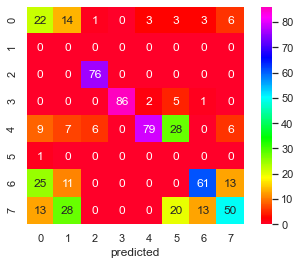

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
confusion_plot()

### DecisionTreeClassifier

In [219]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='coolwarm', square=True)
    plt.xlabel("predicted")
    plt.show()

In [221]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8986486486486487 Random state:- 10


accuracy_score:- 0.8851351351351351
              precision    recall  f1-score   support

           1       0.66      0.67      0.66        69
           2       0.77      0.85      0.81        68
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        76
           5       0.95      0.89      0.92        82
           6       0.98      0.89      0.93        54
           7       0.91      0.95      0.93        76
           8       0.82      0.81      0.82        85

    accuracy                           0.89       592
   macro avg       0.89      0.88      0.88       592
weighted avg       0.89      0.89      0.89       592



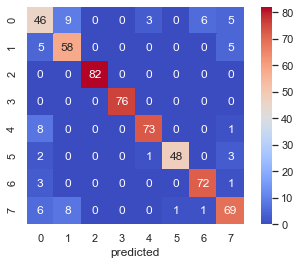

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

### KNeighborsClassifier

In [233]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='icefire', square=True)
    plt.xlabel("predicted")
    plt.show()

In [237]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8885135135135135 Random state:- 57


accuracy_score:- 0.8885135135135135
              precision    recall  f1-score   support

           1       0.65      0.82      0.73        50
           2       0.63      0.83      0.72        52
           3       0.97      1.00      0.99        77
           4       1.00      0.99      0.99        82
           5       1.00      0.91      0.95        88
           6       0.99      0.87      0.93        79
           7       1.00      0.91      0.95        90
           8       0.77      0.72      0.74        74

    accuracy                           0.89       592
   macro avg       0.88      0.88      0.87       592
weighted avg       0.90      0.89      0.89       592



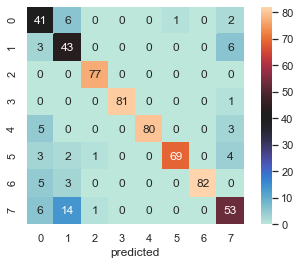

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=57)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

### Support Vector Classifier

In [239]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
    plt.xlabel("predicted")
    plt.show()

In [242]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8125 Random state:- 83


accuracy_score:- 0.8125
              precision    recall  f1-score   support

           1       0.45      0.62      0.52        50
           2       0.56      0.85      0.67        46
           3       0.99      1.00      0.99        81
           4       1.00      0.97      0.99        79
           5       0.97      0.79      0.87        92
           6       0.75      0.62      0.68        58
           7       0.95      0.82      0.88       113
           8       0.70      0.70      0.70        73

    accuracy                           0.81       592
   macro avg       0.80      0.80      0.79       592
weighted avg       0.84      0.81      0.82       592



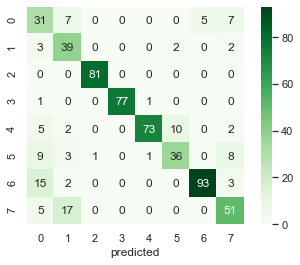

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

### RandomForestClassifier

In [244]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis', square=True)
    plt.xlabel("predicted")
    plt.show()

In [247]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9206081081081081 Random state:- 5


accuracy_score:- 0.9222972972972973
              precision    recall  f1-score   support

           1       0.68      0.89      0.77        56
           2       0.80      0.81      0.80        53
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        82
           5       1.00      0.95      0.97        95
           6       0.97      0.89      0.93        76
           7       1.00      0.99      0.99        71
           8       0.88      0.81      0.84        83

    accuracy                           0.92       592
   macro avg       0.92      0.92      0.91       592
weighted avg       0.93      0.92      0.92       592



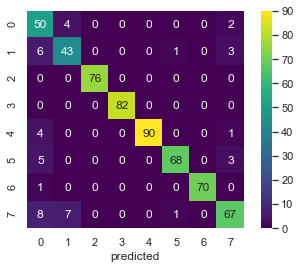

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

### AdaBoostClassifier

In [249]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='mako', square=True)
    plt.xlabel("predicted")
    plt.show()

In [251]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.5743243243243243 Random state:- 37


accuracy_score:- 0.5743243243243243
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.40      0.73      0.51        37
           3       0.95      1.00      0.97        78
           4       1.00      0.95      0.97        77
           5       1.00      0.27      0.43       287
           6       0.00      0.00      0.00         0
           7       0.92      0.74      0.82       113
           8       0.00      0.00      0.00         0

    accuracy                           0.57       592
   macro avg       0.53      0.46      0.46       592
weighted avg       0.94      0.57      0.65       592



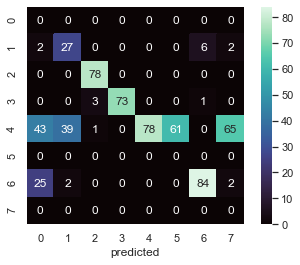

In [252]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=37)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

### GradientBoostingClassifier

In [253]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='magma', square=True)
    plt.xlabel("predicted")
    plt.show()

In [255]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9037162162162162 Random state:- 32


accuracy_score:- 0.9037162162162162
              precision    recall  f1-score   support

           1       0.69      0.86      0.76        56
           2       0.80      0.77      0.79        62
           3       0.99      1.00      0.99        82
           4       1.00      1.00      1.00        86
           5       0.94      0.92      0.93        86
           6       0.93      0.93      0.93        56
           7       0.97      0.90      0.94        84
           8       0.85      0.80      0.83        80

    accuracy                           0.90       592
   macro avg       0.90      0.90      0.90       592
weighted avg       0.91      0.90      0.91       592



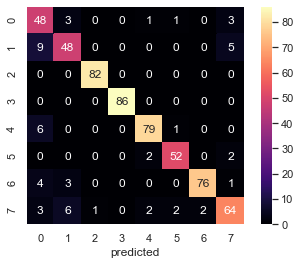

In [256]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

### Cross Validation

In [259]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.69367089 0.70558376 0.70812183 0.70812183 0.67766497]
0.6986326543725502
MultinomialNB()
[0.58227848 0.59390863 0.61675127 0.60406091 0.57106599]
0.5936130566086231
DecisionTreeClassifier()
[0.8        0.80456853 0.86294416 0.85786802 0.86040609]
0.8371573604060913
KNeighborsClassifier()
[0.85316456 0.80203046 0.85279188 0.84517766 0.84771574]
0.8401760586005269
SVC()
[0.77974684 0.74873096 0.80964467 0.79949239 0.76395939]
0.7803148493221101
RandomForestClassifier()
[0.87594937 0.86294416 0.90862944 0.87055838 0.90609137]
0.8848345434684829
AdaBoostClassifier()
[0.55443038 0.49492386 0.35532995 0.53553299 0.48730964]
0.4855053652894686
GradientBoostingClassifier()
[0.83797468 0.8248731  0.87817259 0.86040609 0.88071066]
0.8564274240185055


##### Random Forest Classifier is the best model

In [262]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
    plt.xlabel("predicted")
    plt.show()

accuracy_score:- 0.9239864864864865
              precision    recall  f1-score   support

           1       0.70      0.90      0.79        58
           2       0.80      0.83      0.81        52
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        82
           5       1.00      0.94      0.97        96
           6       0.96      0.89      0.92        75
           7       1.00      0.97      0.99        72
           8       0.88      0.83      0.85        81

    accuracy                           0.92       592
   macro avg       0.92      0.92      0.92       592
weighted avg       0.93      0.92      0.93       592



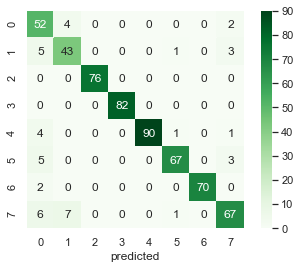

In [292]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

## Hyperparameters for a model

In [264]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [266]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best score:', rfc_grid.best_score_)
    print('Best score:', rfc_grid.best_params_)
    print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8796154210476462
Best score: {'criterion': 'entropy', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(criterion='entropy', max_features='sqrt')
Best score: 0.8788843950117964
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.8854281949934124
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')
Best score: 0.8839883551673946
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClassifier(max_features='log2')
Best score: 0.8868745467730239
Best score: {'criterion': 'gini', 'max_features': 'auto'}
Best score: RandomForestClassifier()
Best score: 0.8839981852399517
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClassifier(max_features='log2')
Best score: 0.8868847202180535
Best score: {'criterion': 'entropy', 'max_features': 'log2'}
Best score: RandomForestClassi

In [272]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=10)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8898021792023696
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClassifier(max_features='log2')


### ROC Curve

In [308]:
pred_prob=rfc_grid.best_estimator_.predict_proba(x_test)

In [309]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=8

In [310]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

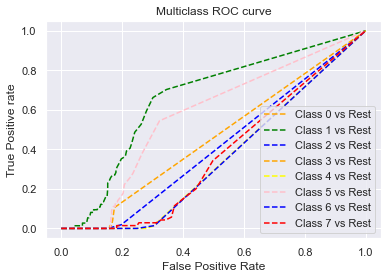

In [311]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='blue', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='red', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

### Save the model

In [312]:
import joblib

In [313]:
#save the model
joblib.dump(rfc_grid.best_estimator_,'global_power_plant_rfc.obj')

['global_power_plant_rfc.obj']

In [314]:
#load model
rfc_load=joblib.load('global_power_plant_rfc.obj')

In [315]:
#check the model is working or not
rfc_load.predict(x_test)

array([3, 6, 2, 8, 8, 5, 3, 5, 6, 4, 4, 6, 8, 7, 7, 5, 3, 5, 5, 4, 4, 1,
       4, 5, 6, 8, 6, 4, 6, 3, 1, 8, 8, 1, 6, 1, 8, 8, 2, 5, 8, 3, 4, 1,
       8, 1, 5, 3, 4, 6, 2, 7, 6, 5, 4, 2, 5, 5, 7, 6, 3, 5, 1, 7, 3, 4,
       8, 7, 7, 2, 5, 6, 8, 4, 3, 5, 4, 7, 6, 1, 2, 8, 7, 1, 1, 5, 5, 3,
       4, 1, 8, 3, 3, 7, 1, 6, 4, 5, 2, 3, 4, 6, 1, 8, 8, 7, 2, 6, 8, 2,
       6, 5, 2, 7, 3, 3, 3, 5, 5, 1, 3, 3, 6, 7, 8, 2, 1, 2, 2, 8, 1, 5,
       6, 3, 6, 4, 5, 7, 6, 1, 1, 1, 4, 4, 6, 3, 6, 1, 4, 6, 8, 5, 4, 8,
       5, 1, 3, 7, 6, 3, 6, 3, 3, 2, 7, 6, 4, 4, 7, 2, 5, 3, 2, 2, 4, 6,
       2, 8, 3, 5, 5, 2, 7, 7, 6, 8, 4, 8, 3, 5, 6, 4, 6, 5, 5, 1, 2, 1,
       7, 8, 4, 6, 6, 8, 7, 5, 8, 6, 7, 5, 5, 4, 3, 8, 1, 4, 7, 6, 3, 6,
       2, 5, 1, 1, 3, 7, 6, 3, 3, 4, 4, 7, 4, 8, 1, 6, 7, 8, 7, 6, 5, 4,
       5, 5, 1, 6, 7, 2, 4, 8, 1, 4, 2, 5, 7, 4, 3, 5, 1, 4, 6, 6, 7, 8,
       8, 4, 1, 1, 6, 4, 2, 4, 2, 1, 6, 5, 5, 3, 1, 8, 3, 5, 3, 4, 1, 5,
       8, 6, 4, 5, 7, 7, 2, 3, 4, 4, 5, 8, 8, 2, 3,

In [316]:
rfc_pre=rfc_load.predict(x_test)

In [317]:
#Accuracy Score
accuracy_score(rfc_pre,y_test)

0.9172297297297297

# 2.capacity_mw

In [319]:
df1

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0       0        657            9       731        143            2   
1       1        519          177       594        234            2   
2       2        853          121       420          8            2   
3       3          0          200       547        806            2   
4       4          1          340       423        702            2   
..    ...        ...          ...       ...        ...          ...   
902   902        491          336       176        480            2   
903   903        822           10       104        553            2   
904   904        891           81       151        311            2   
905   905        539          167       572        167            2   
906   906        876           56        32        495            2   

     commissioning_year  owner  source  url  geolocation_source  \
0                    66    229     109  128                   1   
1                    52    258     174  173                   2   
2                    52      2      21  205                   2   
3                    59      5      22   58                   2   
4                    70      5      22   58                   2   
..                  ...    ...     ...  ...                 ...   
902                  71      5      22   58                   2   
903                  52    114      77   22                   0   
904                  52      5      21  260                   2   
905                  52     91      59   82                   2   
906                  52    279      21  245                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                    250                  265                  268   
1                    250                  265                  268   
2                    250                  265                  268   
3                    156                  196                  197   
4                    272                  349                  360   
..                   ...                  ...                  ...   
902                  250                    3                   99   
903                  250                  265                  268   
904                  250                  265                  268   
905                  250                  265                  268   
906                  250                  265                  268   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                    270                  272             3  
1                    270                  272             1  
2                    270                  272             4  
3                    176                  174             8  
4                    339                  374             1  
..                   ...                  ...           ...  
902                  193                  182             1  
903                  270                  272             3  
904                  270                  272             4  
905                  270                  272             1  
906                  270                  272             4  

[907 rows x 17 columns]

In [321]:
#check the shape
df1.shape

(907, 17)

In [322]:
#check null values
df1.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
primary_fuel           0
dtype: int64

### Checking outliers

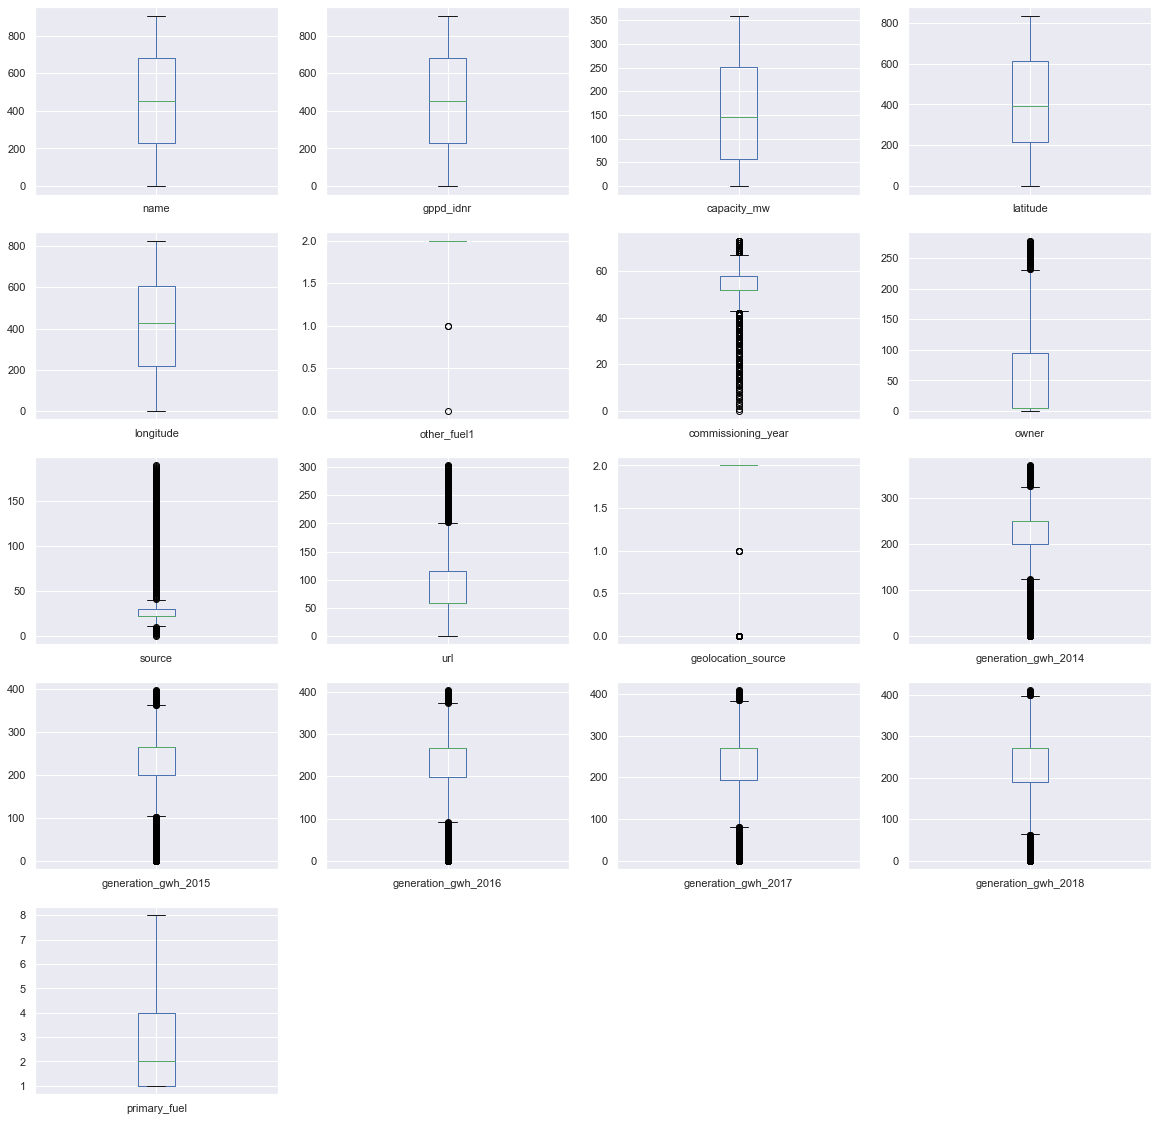

In [326]:
df1.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20));

### Removing Outliers

In [327]:
from scipy.stats import zscore

In [328]:
z=np.abs(zscore(df1))

In [329]:
threshold=3
print(np.where(z>3))

(array([ 71,  80, 191, 222, 299, 321, 342, 345, 371, 444, 454, 478, 484,
       538, 541, 573, 583, 592, 601, 621, 661, 669, 689, 706, 709, 728,
       807, 811, 813, 817, 832, 848, 870, 871, 879, 895, 900], dtype=int64), array([8, 8, 8, 6, 8, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8,
       8, 6, 6, 6, 6, 5, 5, 5, 8, 6, 8, 8, 8, 8, 8], dtype=int64))


In [330]:
df_new=df1[(z<3).all(axis=1)]

### Variance Inflation Factor(VIF)

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [336]:
x=df_new.drop('capacity_mw',axis=1)

In [337]:
y=df_new['capacity_mw']

In [339]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [340]:
vif()

Variables  VIF Factor
0                  name    1.394589
1             gppd_idnr    4.028004
2              latitude    1.171610
3             longitude    1.386552
4           other_fuel1   62.589221
5    commissioning_year    1.079911
6                 owner    3.334210
7                source    2.802636
8                   url    2.169655
9    geolocation_source    2.100889
10  generation_gwh_2014    4.098385
11  generation_gwh_2015    6.571911
12  generation_gwh_2016    9.837059
13  generation_gwh_2017   10.567886
14  generation_gwh_2018   11.207178
15         primary_fuel    1.234678

In [341]:
#latitude,longitude,name,geolocation_source,commissioning_year as same VIF Factor , so drop latitude,longitude and name
x.drop('latitude',axis=1,inplace=True)
x.drop('longitude',axis=1,inplace=True)
x.drop('name',axis=1,inplace=True)
#owner and generation_gwh_2014 as same VIF Factor so,drop owner
x.drop('url',axis=1,inplace=True)
#gppd_idnr and generation_gwh_2014 as Same VIF Factor
x.drop('gppd_idnr',axis=1,inplace=True)

In [343]:
x.shape

(870, 11)

### Checking Skewness

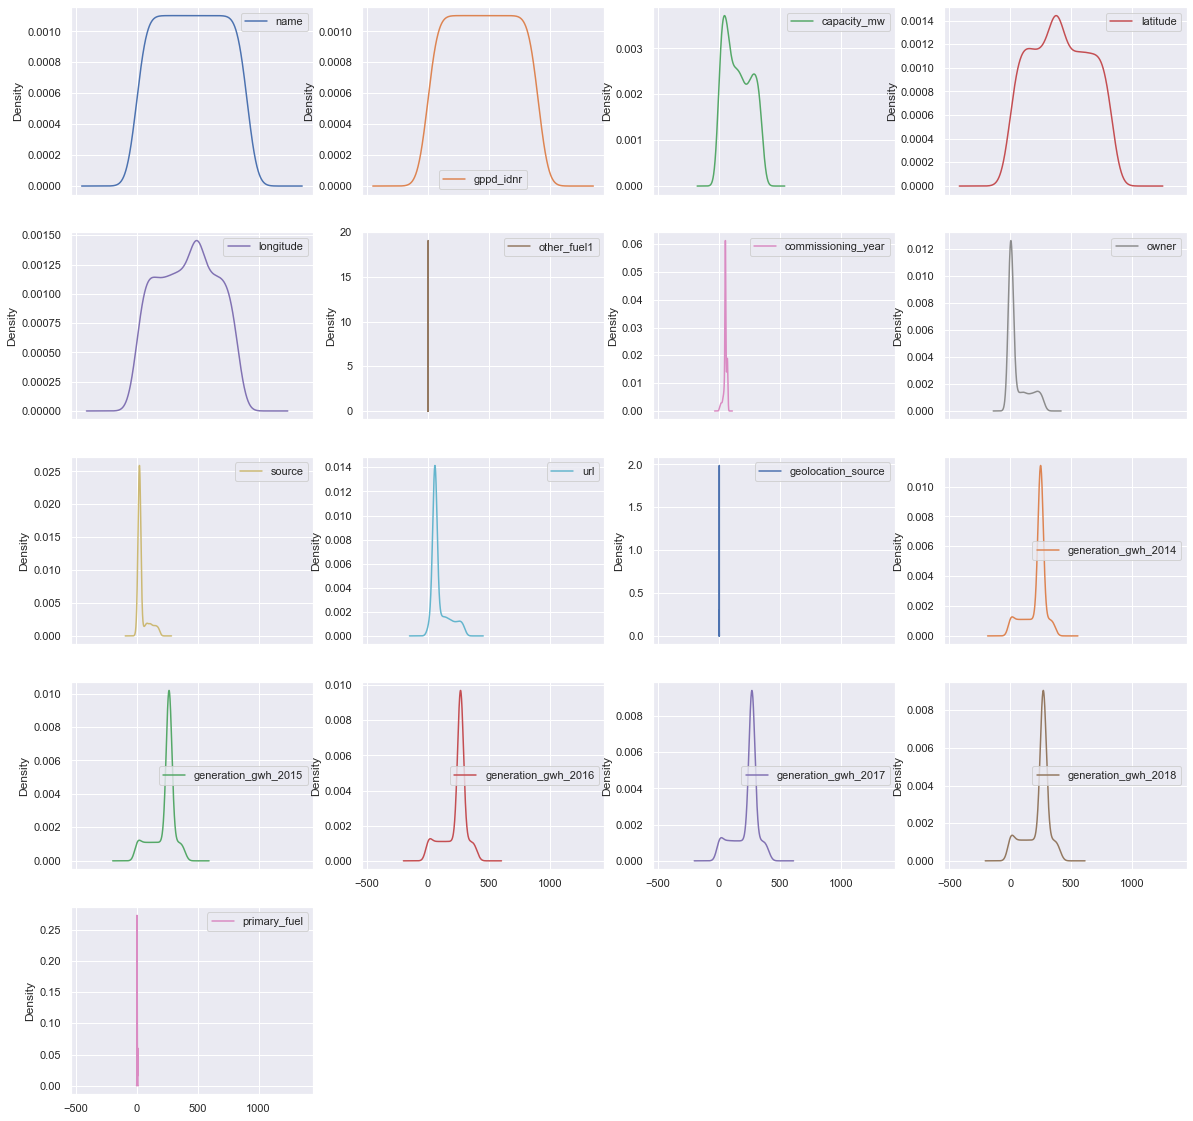

In [347]:
df1.plot(kind='kde',subplots=True,layout=(5,4),figsize=(20,20));

In [348]:
x.skew().sort_values(ascending=False)

source                 1.842551
owner                  1.379098
primary_fuel           1.254226
other_fuel1            0.000000
commissioning_year    -0.831649
generation_gwh_2018   -1.006355
generation_gwh_2017   -1.024655
generation_gwh_2016   -1.059365
generation_gwh_2015   -1.117236
generation_gwh_2014   -1.214772
geolocation_source    -2.160924
dtype: float64

### Standard Scale

In [351]:
from sklearn.preprocessing import MinMaxScaler

In [352]:
scale=MinMaxScaler()

In [353]:
x=scale.fit_transform(x)

### Model Selection

In [367]:
#model selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [357]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()
gtr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [358]:
list_model=[lr,dtr,knr,svr,rfr,gtr,abr]

### LinearRegression

In [362]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('accuracy_score:-',maxscore,'Random state:-',maxrn)

accuracy_score:- 0.45164078249129713 Random state:- 49


In [366]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=49)
lr.fit(x_train,y_train)
print('score:',lr.score(x_train,y_train))
pred=lr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.45164078249129713
mean_absolute_error: 71.70385261222874
mean_squared_error: 7874.42699326649
r2_score: -0.6773243159017515


### DecisionTreeRegressor

In [361]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('accuracy_score:-',maxscore,'Random state:-',maxrn)

accuracy_score:- 0.9862923364807078 Random state:- 8


In [368]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=8)
dtr.fit(x_train,y_train)
print('score:',dtr.score(x_train,y_train))
pred=dtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.9862923364807078
mean_absolute_error: 37.53472497467742
mean_squared_error: 3067.942116563377
r2_score: 0.7045084162098495


### KNeighborsRegressor

In [369]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('accuracy_score:-',maxscore,'Random state:-',maxrn)

accuracy_score:- 0.8616605871291173 Random state:- 4


In [370]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=4)
knr.fit(x_train,y_train)
print('score:',knr.score(x_train,y_train))
pred=knr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.8616605871291173
mean_absolute_error: 44.16934865900383
mean_squared_error: 4347.423601532567
r2_score: 0.45183227992884456


### Support Vector Regressor(SVR)

In [371]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('accuracy_score:-',maxscore,'Random state:-',maxrn)

accuracy_score:- 0.27243804455007203 Random state:- 34


In [372]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=34)
svr.fit(x_train,y_train)
print('score:',svr.score(x_train,y_train))
pred=svr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.27243804455007203
mean_absolute_error: 79.27844491829059
mean_squared_error: 8491.335706057389
r2_score: -12.28941118851421


### RandomForestRegressor

In [373]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('accuracy_score:-',maxscore,'Random state:-',maxrn)

accuracy_score:- 0.9675801245754878 Random state:- 51


In [374]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)
rfr.fit(x_train,y_train)
print('score:',rfr.score(x_train,y_train))
pred=rfr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.9672593337673897
mean_absolute_error: 36.43283729443884
mean_squared_error: 2807.104773200099
r2_score: 0.7281375230325482


### GradientBoostingRegressor

In [376]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gtr.fit(x_train,y_train)
    score=gtr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('accuracy_score:-',maxscore,'Random state:-',maxrn)

accuracy_score:- 0.9217999544189537 Random state:- 89


In [377]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=89)
gtr.fit(x_train,y_train)
print('score:',gtr.score(x_train,y_train))
pred=gtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.9217999544189537
mean_absolute_error: 36.735627672108265
mean_squared_error: 2516.0798793225613
r2_score: 0.7377493458573005


### AdaBoostRegressor

In [378]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('accuracy_score:-',maxscore,'Random state:-',maxrn)

accuracy_score:- 0.8422410904575296 Random state:- 51


In [379]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)
abr.fit(x_train,y_train)
print('score:',abr.score(x_train,y_train))
pred=abr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.839536263812665
mean_absolute_error: 45.02920149902233
mean_squared_error: 3083.093196545018
r2_score: 0.5933382072674842


### Cross Validation

In [380]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LinearRegression()
[0.3900023  0.34461432 0.41008681 0.41075145 0.4378907 ]
0.3986691138872992
DecisionTreeRegressor()
[0.71677681 0.6666941  0.74511891 0.77518438 0.79455129]
0.7396650985522927
KNeighborsRegressor()
[0.71857564 0.69253593 0.74858863 0.80907619 0.74283271]
0.7423218216598844
SVR()
[0.26844403 0.26578944 0.24867646 0.22518321 0.25087337]
0.2517932991355224
RandomForestRegressor()
[0.79881219 0.8209068  0.80840442 0.8367494  0.85288521]
0.8235516042972846
GradientBoostingRegressor()
[0.78789627 0.83994611 0.81419334 0.84402054 0.83819738]
0.8248507285792659
AdaBoostRegressor()
[0.70892434 0.73169022 0.75769275 0.78944751 0.79287282]
0.7561255278915139


### DecisionTreeRegressor is the best model

In [383]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=8)
dtr.fit(x_train,y_train)
print('score:',dtr.score(x_train,y_train))
pred=dtr.predict(x_test)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

score: 0.9862923364807078
mean_absolute_error: 37.243537235213815
mean_squared_error: 2942.915296640005
r2_score: 0.7170058430009202


### Hyperparameters for a model

In [421]:
# Hyper parameters range intialization for tuning 
parameters={"splitter":["best","random"],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

In [422]:
for i in range(3,11):
    grid_model=GridSearchCV(dtr,param_grid=parameters,cv=i)
    grid_model.fit(x_train,y_train)
    print('Best Parameters:',grid_model.best_params_)
    print('Best Estimator',grid_model.best_estimator_)
    print('best_index:',grid_model.best_index_)
    print('score:',grid_model.best_score_)

Best Parameters: {'max_features': None, 'max_leaf_nodes': 60, 'min_samples_leaf': 1, 'splitter': 'random'}
Best Estimator DecisionTreeRegressor(max_leaf_nodes=60, splitter='random')
best_index: 721
score: 0.8184115436553596
Best Parameters: {'max_features': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'splitter': 'random'}
Best Estimator DecisionTreeRegressor(max_leaf_nodes=30, splitter='random')
best_index: 661
score: 0.8307826974134773
Best Parameters: {'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 2, 'splitter': 'random'}
Best Estimator DecisionTreeRegressor(max_leaf_nodes=40, min_samples_leaf=2, splitter='random')
best_index: 683
score: 0.821436185033181
Best Parameters: {'max_features': 'sqrt', 'max_leaf_nodes': 70, 'min_samples_leaf': 5, 'splitter': 'best'}
Best Estimator DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=5)
best_index: 548
score: 0.8203039204512396
Best Parameters: {'max_features': 'auto',

In [427]:
grid_model=GridSearchCV(dtr,param_grid=parameters,cv=4)
grid_model.fit(x_train,y_train)
print('Best Parameters:',grid_model.best_params_)
print('Best Estimator',grid_model.best_estimator_)
print('best_index:',grid_model.best_index_)
print('score:',grid_model.best_score_)

Best Parameters: {'max_features': 'log2', 'max_leaf_nodes': 40, 'min_samples_leaf': 7, 'splitter': 'best'}
Best Estimator DecisionTreeRegressor(max_features='log2', max_leaf_nodes=40,
                      min_samples_leaf=7)
best_index: 292
score: 0.8288819710142058


### Save Model

In [425]:
import joblib

In [428]:
#save the model
joblib.dump(grid_model,'global_power_plant_dtr.obj')

['global_power_plant_dtr.obj']

In [429]:
#load the model
model_load=joblib.load('global_power_plant_dtr.obj')

In [430]:
#check the model is working or not
model_load.predict(x_test)

array([ 79.84782609,  39.42105263,  61.15789474,  29.2       ,
        39.42105263, 216.61904762,  39.42105263, 164.86666667,
        29.2       , 351.        , 328.51724138, 131.88888889,
       118.71875   , 164.86666667, 165.        , 118.71875   ,
       118.71875   ,  55.5       , 162.08333333,  79.27272727,
       278.61111111, 185.57142857, 218.14285714, 162.08333333,
       213.16666667, 177.16666667, 165.        , 204.5       ,
        79.84782609,  79.84782609, 216.61904762,  29.2       ,
       213.16666667, 164.86666667, 306.77777778,  60.61111111,
       278.61111111,  79.84782609,  79.84782609, 118.71875   ,
       164.86666667, 164.86666667, 278.61111111, 217.54545455,
       218.14285714,  41.13333333, 164.86666667, 270.70588235,
       204.5       , 102.88888889, 204.5       , 162.08333333,
        39.42105263, 316.15789474,  39.42105263, 306.77777778,
       216.61904762, 254.47619048, 274.57142857, 140.9375    ,
       102.88888889,  79.84782609, 270.70588235, 306.77